Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Mohlatlego"
StudentNumber = "Nakeng"

---

## COS 802 Homework 1 - Part 2
## NLP Basics


**You will learn how to:**
- Extend to TFIDF
- Split the data into train test 
- Test a logistic regression classifier

**Note:** you can experiment by adding aditional cells, but they must be removed from final solution. Only the cells originally in the notebook plus the ones you have filled with your solution are required.

## 1 Packages ##

Scikit-Learn for text Analysis
- [sklearn](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html): Scikit-Learn Working With Text Data
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Bag of Words: Term Frequencey and TFIDF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## Fetch the AGNews dataset from the FastAI repository

Fast AI repo https://course.fast.ai/datasets

> 496,835 categorized news articles from >2000 news sources from the 4 largest classes from AG’s corpus of news articles, using only the title and description fields. The number of training samples for each class is 30,000 and testing 1900.

In [11]:
import os

if not os.path.isfile('ag_news_csv.tgz'):
    !wget https://s3.amazonaws.com/fast-ai-nlp/ag_news_csv.tgz

#U ncompress the archive
if not os.path.isfile('ag_news_csv/train.csv'):
    !tar -xzf ag_news_csv.tgz
    # Lets see what is in the 
    !ls ag_news_csv/
    # # View categories
    !cat ag_news_csv/classes.txt

Lets put this in a dataframe

In [12]:
df_ag_news_train  = pd.read_csv('ag_news_csv/train.csv', header = None)
df_ag_news_train.columns = ['category','title','text']
df_ag_news_train.head()

,category,title,text
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's see the counts per category

Unique classes:  [3 4 2 1]


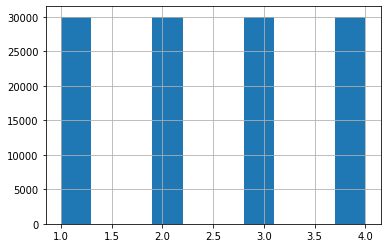

In [13]:
print("Unique classes: ", df_ag_news_train.category.unique())
df_ag_news_train.category.hist()

## Q1: Creating a training and test set

Use the sklearn function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  to split the data into train and test. For simplicity, I have already converted the training data into a binary problem by only focusing if we can classify some text as *Business* or not. As such, instead of predicting 4 different classes, we will just classify 2.

In [14]:
y = df_ag_news_train.category== 3 # Business
print(y[:10])
y =  1.0 * y # converting from True or False to Numerical value
y = y.astype(int) # Making into an integer
df_ag_news_train['y'] = y # Saving in the dataframe
y[:10]

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: category, dtype: bool


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: category, dtype: int32

In [15]:
df_ag_news_train.head(10)

,category,title,text,y
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",1
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,1
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,1
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,1
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",1
5,3,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,1
6,3,Money Funds Fell in Latest Week (AP),AP - Assets of the nation's retail money marke...,1
7,3,Fed minutes show dissent over inflation (USATO...,USATODAY.com - Retail sales bounced back a bit...,1
8,3,Safety Net (Forbes.com),Forbes.com - After earning a PH.D. in Sociolog...,1
9,3,Wall St. Bears Claw Back Into the Black,"NEW YORK (Reuters) - Short-sellers, Wall Stre...",1


Use the **df_agnews_train.text** and **df_ag_news_train.y** to create a text_train, text_test, y_train and y_test via the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. The test_size should be 30% (0.3)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert (0.3 - len(y_test)/len(df_ag_news_train.y)) < 0.0001

## Q2: Binary Classifier for TFIDF and Word-Frequency

In this section, you will test out different classifiers. 

In [ ]:
def initialise_term_frequency_vectorizer(data):
    vectorizer_tf = CountVectorizer()
    vectorizer_tf.fit(data)
    X = vectorizer_tf.transform(data)
    return X, vectorizer_tf

def initialise_tfidf_vectorizer(data):
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(data)
    X = vectorizer_tfidf.transform(data)
    return X, vectorizer_tfidf

In [ ]:
"""Check that squares returns the correct output for several inputs"""
X_train, vectorizer_tf = initialise_term_frequency_vectorizer(text_train)
X_train_tfidf, vectorizer_tfidf = initialise_tfidf_vectorizer(text_train)

In [ ]:
X_train.shape

In [ ]:
X_train_tfidf.shape

Now lets start working on the classifiers. First, let us get a baseline, what is the accuracy to beat. 

In [ ]:
# Baseline 
1 - np.mean(y_train) 

###  Q2.1: Logistic regression with word frequency data

Use [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model to run a 5 fold cross validation. Save the scores in variable **scores** (default is accuracy) and name the classifier **clf**. Use the word frequency data, in *X_train* and *y_train*.

Make sure you also use *max_iter* of 1000 for the LogisticRegression

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation Accuracy for Word Frequency: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
assert len(scores) == 5
assert scores.mean() > 0.85
assert scores.std() < 0.01

### Q2.2:  Logistic regression with TFIDF data

Use `cross_val_score` and `LogisticRegression` model to run a 5 fold cross validation. Save the scores in variable **scores_tfidf** and name the classifier **clf**. Use the word frequency data, in *X_train_tfidf* and *y_train*.

Make sure you also use *max_iter* of 1000 for the LogisticRegression

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation Accuracy for TFIDF: %0.2f (+/- %0.2f)" % (scores_tfidf.mean(), scores_tfidf.std() * 2))

In [ ]:
assert len(scores_tfidf) == 5
assert scores_tfidf.mean() > 0.85
assert scores_tfidf.std() < 0.01

### Q2.3:  Using F1 Score Instead.

Change the score from accuracy to F1 for both word frequency. Look at options for `cross_val_score`. 
Make sure you also use *max_iter* of 1000 for the LogisticRegression

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
# YOUR CODE SHOULD BE ABOVE THIS LINE
print("5-fold Cross-Validation F1 score for Word Frequency: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print("5-fold Cross-Validation F1 score for TFIDF: %0.2f (+/- %0.2f)" % (scores_tfidf_f1.mean(), scores_tfidf_f1.std() * 2))

In [ ]:
assert len(scores_f1) == 5
assert scores_f1.mean() > 0.82
assert scores_f1.std() < 0.02
assert len(scores_tfidf_f1) == 5
assert scores_tfidf_f1.mean() > 0.82
assert scores_tfidf_f1.std() < 0.02

### Q2.4: Why would we use F1 score instead of just accuracy

YOUR ANSWER HERE

## Now lets look at one model and how it predicts

In [ ]:
test_sample = text_test.iloc[0:2]
X_sample = vectorizer_tfidf.transform(test_sample)
test_sample

Now lets fit one model and see the prediction

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
clf.predict(X_sample)

## Q3: Can you improve the classifier?

For the vectorizers, change the number of n-grams (ngram_range), size of vector (num_features) in the vectorizers to try and improve the performance. Measure the F1 and the accuracy changes (if any)

In [ ]:
def initialise_term_frequency_vectorizer(data):
    vectorizer_tf = CountVectorizer()
    vectorizer_tf.fit(data)
    X = vectorizer_tf.transform(data)
    return X, vectorizer_tf

def initialise_tfidf_vectorizer(data):
    vectorizer_tfidf = TfidfVectorizer()
    vectorizer_tfidf.fit(data)
    X = vectorizer_tfidf.transform(data)
    return X, vectorizer_tfidf

A 3.1 Write your code changes below and run your experiments.

In [ ]:
# A3.1 here.
# YOUR CODE HERE
raise NotImplementedError()

### Discuss your findings
A 3.2 Write your observations below. What do you notice in the performance, computation etc.?

#### A3.2 here.
YOUR ANSWER HERE